# Boundary value problems

by [Richard Tsai](https://www.researchgate.net/profile/Richard_Tsai3)

We discuss the accuracy of the finite difference approximations the Dirichlet problem for Poisson's equation.

### Example: solving a two-point boundary value problem for Poisson's equation

$$ -u_{xx} =f(x),~~~0<x<1,~~~u(0)=u(1)=0 $$

* Discretize the unit interval: $x_j = j\Delta x, j=0,1,2,\cdots,N,\Delta x =1/N$

* Approximate the differential equation on the grid nodes:
    $$ -u_{xx} (x_j)=f(x_j) \approx -(u_{j+1}-2u_j+u_{j-1})/\Delta x^2 = f(x_j),~~~j=1,2,\cdots,N-1 $$

* Set the boundary conditions: $u_0=0=u_N$.

This leads to a linear system to solve: $AU=F$.

In [41]:
N=50
xgrid=linspace(0,1,N+1)
Δx=1/N

f=x-> 1.0 #x.^2+0.0*sin(20*x)

#The vector U stores (u1,u2,u3,cdots, u_(N-1))
U=zeros(N-1)

#N-2 because we exclude x=0 and X=1.
A=spdiagm( (ones(N-2), -2.0*ones(N-1),ones(N-2)), [-1,0,1])

F=collect(f.(xgrid[2:end-1]))

b=F.*Δx^2

@time U=-A\b;


LoadError: [91minvalid redefinition of constant f[39m

### Poisson equation in  two and three dimensions

$$-(u_{xx}+u_{yy}+u_{zz})=f(x,y,z),~~~0<x,y,z<1$$

with zero Dirichlet boundary conditions.


#### Useful identities

$A$ is $m\times m$, $B$ is $n\times n$, and $U$ is $m\times n$

$X$ is the "vectorized" version of $U$.

$\otimes$ is the **Kronecker product**.

vec($AX$)=$(I_n\otimes A)X$

vec($XB$)=$(B^\top\otimes I_m)X$

vec($T_M U + U T_n$) = $(I_N\otimes T_M+ T_N^\top\otimes I_M) X $

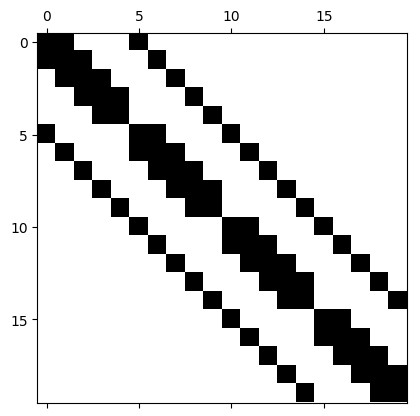

PyObject <matplotlib.image.AxesImage object at 0x1403ba610>

In [24]:
M,N=5,6
xgrid=linspace(0,1,M+1)
ygrid=linspace(0,1,N+1)
Δx=1/M
Δy=1/N

#assemling the finite different operator for the left hand side of the PDE
TM=spdiagm( (-ones(M-2), 2.0*ones(M-1),-ones(M-2)), [-1,0,1])/Δx^2
IM=speye(M-1,M-1)

TN=spdiagm( (-ones(N-2), 2.0*ones(N-1),-ones(N-2)), [-1,0,1])/Δy^2
IN=speye(N-1,N-1)


A2=kron(IM,TN)+kron(TM,IN)

using PyPlot
spy(A2)

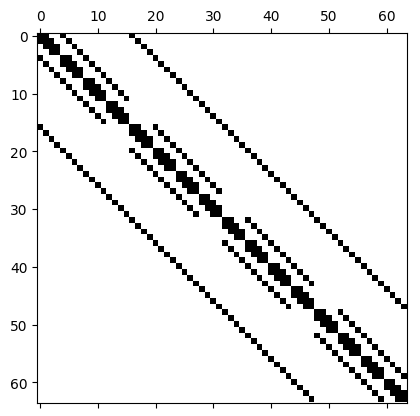

PyObject <matplotlib.image.AxesImage object at 0x14024bc90>

In [2]:
xgrid=linspace(0,1,M+1)
ygrid=linspace(0,1,N+1)
zgrid=linspace(0,1,N+1)

f(x,y,z)= x^2+y^2+z^2

A3=kron(kron(T,I),I)+ kron(I,kron(I,T))+ kron(kron(I,T),I)

size(A3)

using PyPlot
spy(A3)

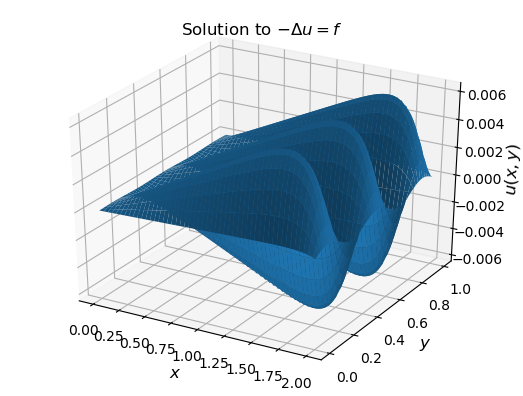

cg achieved desired tolerance at iteration 696. Residual norm is 9.27e-11.
  0.491818 seconds (1.50 k allocations: 1.934 MiB)


PyObject Text(0.0910982,0.0122048,u'$u(x,y)$')

In [7]:
f(x,y)=x.*sin(5π.*y)

M,N=250,250
xgrid=linspace(0,2,M+1)
ygrid=linspace(0,1,N+1)
Δx=1/M
Δy=1/N

#assemling the finite different operator for the left hand side of the PDE
TM=spdiagm( (-ones(M-2), 2.0*ones(M-1),-ones(M-2)), [-1,0,1])/Δx^2
IM=speye(M-1,M-1)

TN=spdiagm( (-ones(N-2), 2.0*ones(N-1),-ones(N-2)), [-1,0,1])/Δy^2
IN=speye(N-1,N-1)


A2=kron(IN,TM)+kron(TN,IM)

F=zeros(M-1,N-1)

for j=2:N-1, i=2:M-1
    F[i,j]=f( xgrid[i], ygrid[j])
end

b=F[:]


using KrylovMethods

@time uu=KrylovMethods.cg(A2, b, tol=1e-10, maxIter=1500, out=1)

U=reshape(uu[1], M-1,:)

using PyPlot

pygui(false)

surf(repmat(xgrid[2:end-1], 1,N-1), repmat(ygrid[2:end-1]', M-1,1),U)
# some latex labels
title(L"Solution to $-\Delta u = f$")
xlabel(L"$x$", fontsize=12); 
ylabel(L"$y$", fontsize=12); 
zlabel(L"$u(x,y)$", fontsize=12)


In [8]:
@time V=A2\b;

  0.211569 seconds (68 allocations: 57.485 MiB, 14.93% gc time)


In [13]:
N=150
xgrid=linspace(0,1,N+1)
Δx=1/N

#assemling the finite different operator for the left hand side of the PDE
T=spdiagm( (-ones(N-2), 2.0*ones(N-1),-ones(N-2)), [-1,0,1])
I=speye(N-1,N-1)

A3=kron(kron(T,I),I)+ kron(I,kron(I,T))+ kron(kron(I,T),I)/Δx^2


F=zeros(N-1,N-1, N-1)

for k=2:N-1,j=2:N-1, i=2:N-1
    F[i,j,k]=f(xgrid[i], ygrid[j])
end

b=F[:]

using KrylovMethods

@time uu=KrylovMethods.cg(A3, b, tol=1e-6, maxIter=1500, out=1);

@time uu=KrylovMethods.cg(A3, b, tol=1e-10, maxIter=1500, out=1);

@time uu=KrylovMethods.cg(A3, b, tol=1e-14, maxIter=1500, out=1);

size(A3)

cg achieved desired tolerance at iteration 164. Residual norm is 9.49e-07.
  9.419577 seconds (433 allocations: 100.972 MiB, 0.90% gc time)
cg achieved desired tolerance at iteration 303. Residual norm is 2.40e-11.
 17.132543 seconds (763 allocations: 100.988 MiB, 0.09% gc time)
cg achieved desired tolerance at iteration 450. Residual norm is 8.80e-15.
 26.368031 seconds (1.05 k allocations: 100.993 MiB, 0.46% gc time)


(3307949, 3307949)

In [ ]:
@time W=A3\b

# Error analysis

We use the 1D example for discussion about errors and accuracy of the equation:

$$ -u_{xx} =f(x),~~~0<x<1,~~~u(0)=u_L, u(1)=u_R$$

* Discretize the unit interval: $x_j = jh, j=0,1,2,\cdots,Nh =1/N$

* Approximate the differential equation on the grid nodes:
    $$ -u_{xx} (x_j)=f(x_j)$$
    is approximated on $x_j$ by
    $$(D1)\,\,\,-(u_{j+1}-2u_j+u_{j-1})/h^2 = f(x_j),~~~j=1,2,\cdots,N-1 $$

* Set the boundary conditions: $u_0=u_L, u_N=u_R$.

This leads to a linear system to solve: $A_hU=F+b$, where $U=(u_1, u_2,\cdots,u_{N-1})^\top$, $F=(f(x_1),f(x_2),\cdots,f(x_{N-1}))^\top$, $b=(u_L, 0,\cdots, u_R)^\top$. 

### Local Truncation error

* In the finite differences, replace $u_j$ by $u(x_j)$ and $u_{j\pm1}$ by $u(x_{j\pm1})$.
* Taylor expansion of $u(x_{j\pm1})=u(x_j\pm h)$ around $x_j$.
* Use the PDE: $u_xx(x_j)=f(x_j)$.

We shall find the terms $h^2 \tau_j$, with $\tau_j$ related to some mean value of $u_{xxxx}$ such that 

$$(D2)\,\,\,-(u(x_{j+1})-2u(x_j)+u(x_{j-1}))/h^2 = f(x_j)+h^2\tau_j.$$

$h^2\tau_j$ is the **local truncation error**.

### The error equation

Define the error $e_j:= u(x_j)- u_j$ and the error vector $E_h:=(e_1,e_2,\cdots,d_{N-1})^\top$.
Define $T_u:=(\tau_1,\cdots,\tau_{N-1})^\top$.

Then $(D2)-(D1)\implies$
$$A_h E_h = h^2 T_u,$$
and 
$$||E_h||\le h^2||A_h^{-1}|| ||T_u||.$$

If $|\tau_j|$ and $||A_h^{-1}||$ are bounded above by some constant that does not depend on $h$, then $E_h\sim O(h^2).$

### Discussion

What information can we deduce from the above?

* Is there a situation for which the method has no error?
* What happens if the evaluation of $f(x_j)$ contains some errors of size $\delta$?
* If we make some errors in approximating the boundary conditions, say in the vector $b$, $u_L$ s replaced by a perturbation of it, $u_L+O(h)$, how would this influence the other of acurracy?
* Why do we keep the $h^{-2}$ term in $A_h$?

In [11]:
for N in [25, 50, 100, 200, 400]
    
h=1/N

#N-2 because we exclude x=0 and X=1.
A=diagm(2.0*ones(N-1), 0)-diagm( ones(N-2), 1)-diagm( ones(N-2), -1)

@printf "||A_h^{-1}|| = %f\n" h^2*norm(A^-1)
    
end

println("\nObserve that the values only stays approximately the same after normalization of A by 1/h^2.")

||A_h^{-1}|| = 0.101455
||A_h^{-1}|| = 0.101355
||A_h^{-1}|| = 0.101330
||A_h^{-1}|| = 0.101323
||A_h^{-1}|| = 0.101322

Observe that the values only stays approximately the same after normalization of A by 1/h^2.


#### Numerical convergence test

With $f(x)=\cos(x)$, we can integrate and find the explicit solution for the 1D model problem:

$$-u_{xx}=f \implies -u_x = \sin(x)+C_1 \implies -u(x)=-\cos(x)+C_1x+C_2$$

Plug in $u(0)=uL$ and $u(1)=uR$ to find $C_1$ and $C_2$.

$u(x)=\cos(x)+u_L+(u_R-u_L-\cos(1))x-1$

Use this to study how error decreases as a function of $h$.

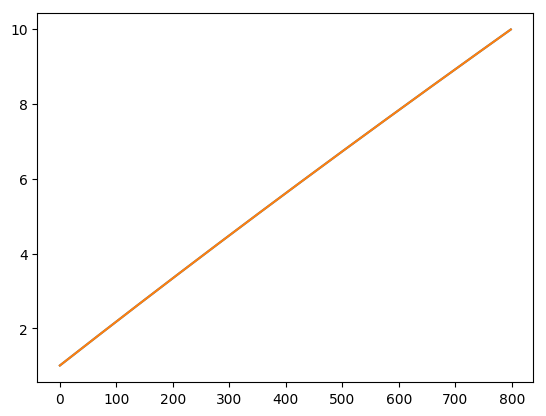

  0.000069 seconds (54 allocations: 12.016 KiB)
  0.000048 seconds (54 allocations: 22.188 KiB)
  0.000045 seconds (54 allocations: 42.406 KiB)
  0.000081 seconds (54 allocations: 83.250 KiB)
  0.000152 seconds (54 allocations: 164.344 KiB)
  0.000285 seconds (54 allocations: 326.844 KiB)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1342a4250>

In [63]:
f(x)=cos.(x)

u_exact(x, uL, uR)=cos.(x)+uL+(uR-uL-cos(1.0)+1.0).*x-1.0

uL=1.0
uR=10.0

Err=[]

U=zeros(4)
Uexact=copy(U)

for N in [25, 50, 100, 200, 400, 800]
    
h=1/N
xgrid=linspace(0,1,N+1)

#The vector U stores (u1,u2,u3,cdots, u_(N-1))
U=zeros(N-1)
Uexact=copy(U)

#N-2 because we exclude x=0 and X=1.
A=spdiagm( (-ones(N-2), 2.0*ones(N-1),-ones(N-2)), [-1,0,1])

F=collect(f.(xgrid[2:end-1]))

b=F.*h^2

b[1]+=uL
b[end]+=uR
    
@time U=A\b;

Uexact.=u_exact.(xgrid[2:end-1], uL,uR)
    
Err=[Err; norm(U-Uexact)/norm(Uexact)]
    
end

using PyPlot
xgrid=linspace(0,1,100+1)
#plot(xgrid,u_exact.(xgrid, uL, uR))
plot(Uexact)
plot(U)



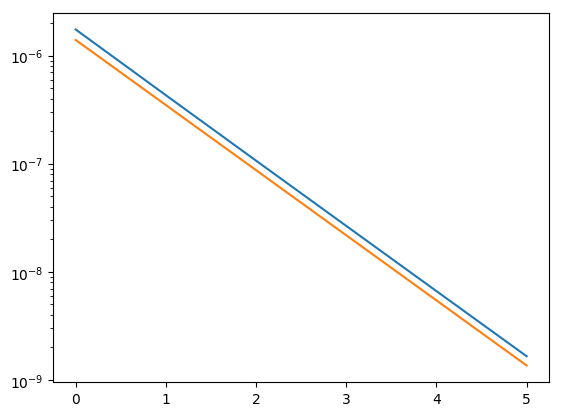

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x134ac41d0>

In [64]:
semilogy(Err)
semilogy(0.8*Err[1]*2.0.^[0 -2 -4 -6 -8 -10]')

Confirms that the errors is inversely proportional to $h$: $h\rightarrow h/2$, then error decreases by a factor of $2^2=4$. 

Second order convergence rate.